In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [8]:
glass = pd.read_csv('glass.csv')
glass.head()
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [12]:
thresholds = [0.3, 0.5, 0.7]
results = []

for threshold in thresholds:
    preds_custom = (glass['household_pred_prob'] >= threshold).astype(int)
    acc = accuracy_score(y, preds_custom)
    prec = precision_score(y, preds_custom)
    rec = recall_score(y, preds_custom)
    
    results.append({
        'Threshold': threshold,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

   Threshold  Accuracy  Precision    Recall
0        0.3  0.864486   0.720000  0.705882
1        0.5  0.869159   0.896552  0.509804
2        0.7  0.836449   1.000000  0.313725


In [15]:
features = [col for col in glass.columns if col not in ['Type', 'household', 'household_pred_prob']]
all_results = []

for feature in features:
    X = np.array(glass[feature]).reshape(-1, 1)
    y = glass['household']

    logreg = LogisticRegression()
    logreg.fit(X, y)
    glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
    for threshold in thresholds:
        preds_custom = (glass['household_pred_prob'] >= threshold).astype(int)
        acc = accuracy_score(y, preds_custom)
        prec = precision_score(y, preds_custom, zero_division=0)  # 避免除零错误
        rec = recall_score(y, preds_custom, zero_division=0)
        
        all_results.append({
            'Feature': feature,
            'Threshold': threshold,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec
        })

results_df = pd.DataFrame(all_results)
print(results_df)

   Feature  Threshold  Accuracy  Precision    Recall
0       RI        0.3  0.761682   0.000000  0.000000
1       RI        0.5  0.761682   0.000000  0.000000
2       RI        0.7  0.761682   0.000000  0.000000
3       Na        0.3  0.827103   0.625000  0.686275
4       Na        0.5  0.855140   0.857143  0.470588
5       Na        0.7  0.803738   1.000000  0.176471
6       Mg        0.3  0.906542   0.792453  0.823529
7       Mg        0.5  0.878505   0.777778  0.686275
8       Mg        0.7  0.878505   0.790698  0.666667
9       Al        0.3  0.864486   0.720000  0.705882
10      Al        0.5  0.869159   0.896552  0.509804
11      Al        0.7  0.836449   1.000000  0.313725
12      Si        0.3  0.803738   0.736842  0.274510
13      Si        0.5  0.771028   1.000000  0.039216
14      Si        0.7  0.761682   0.000000  0.000000
15       K        0.3  0.775701   1.000000  0.058824
16       K        0.5  0.761682   0.000000  0.000000
17       K        0.7  0.761682   0.000000  0.

In [18]:
glass = pd.read_csv('glass.csv')
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

X = glass.drop(columns=['Type', 'household'])
y = glass['household']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')


Accuracy: 0.9535
Precision: 0.9333
Recall: 0.9333


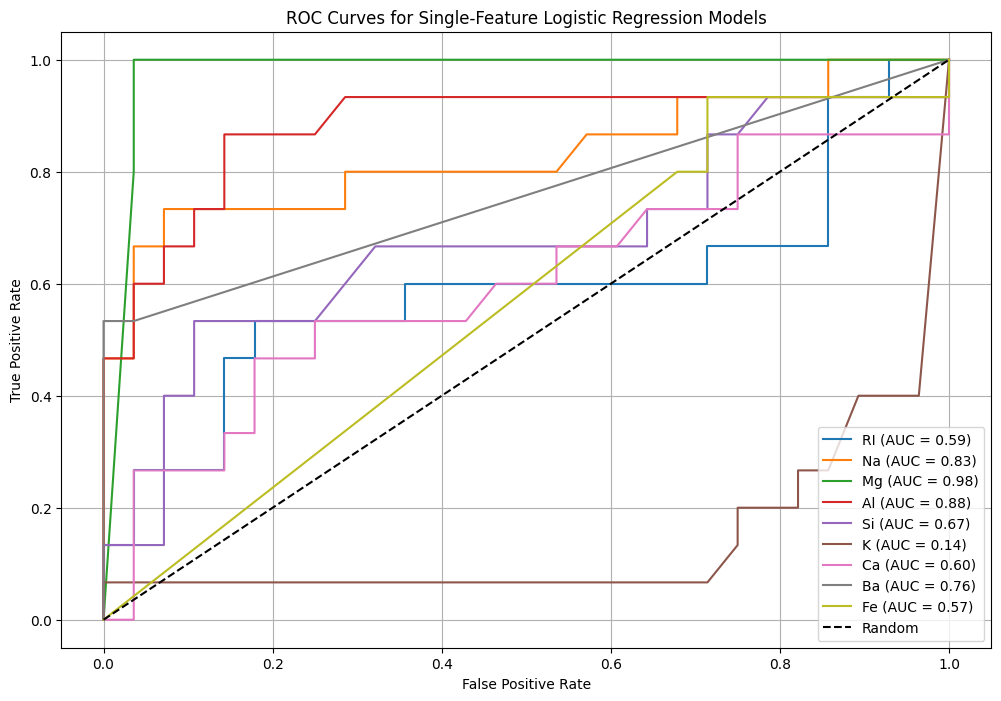

In [ ]:
plt.figure(figsize=(12, 8))

for feature in features:
    X_single = np.array(glass[feature]).reshape(-1,1)
    y = glass['household']
    
    scaler_single = StandardScaler()
    X_single_scaled = scaler_single.fit_transform(X_single)
    
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single_scaled, y, test_size=0.2, random_state=42)
    
    logreg_single = LogisticRegression()
    logreg_single.fit(X_train_s, y_train_s)
    
    y_proba_s = logreg_single.predict_proba(X_test_s)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test_s, y_proba_s)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.title('ROC Curves for Single-Feature Logistic Regression Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


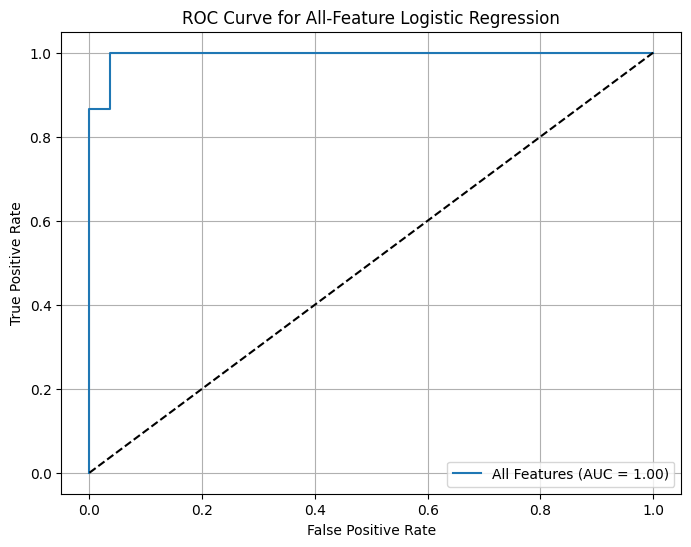

In [23]:
y_proba_all = logreg.predict_proba(X_test)[:,1]

fpr_all, tpr_all, _ = roc_curve(y_test, y_proba_all)
roc_auc_all = auc(fpr_all, tpr_all)

plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, label=f'All Features (AUC = {roc_auc_all:.2f})')
plt.plot([0,1],[0,1],'k--')

plt.title('ROC Curve for All-Feature Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [28]:
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.metrics import silhouette_score

In [26]:
df = pd.read_csv("iris.csv")
cols = df.columns[:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [30]:
k_values = [2, 3, 4, 5, 6, 7, 8]
results = []

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    
    results.append({
        'k': k,
        'Inertia': inertia,
        'Silhouette Score': silhouette
    })

results_df = pd.DataFrame(results)
print(results_df)


   k    Inertia  Silhouette Score
0  2  12.143688          0.629468
1  3   7.138648          0.482472
2  4   5.541658          0.443500
3  5   4.999716          0.422254
4  6   4.070291          0.340587
5  7   3.510434          0.352773
6  8   3.164870          0.339319


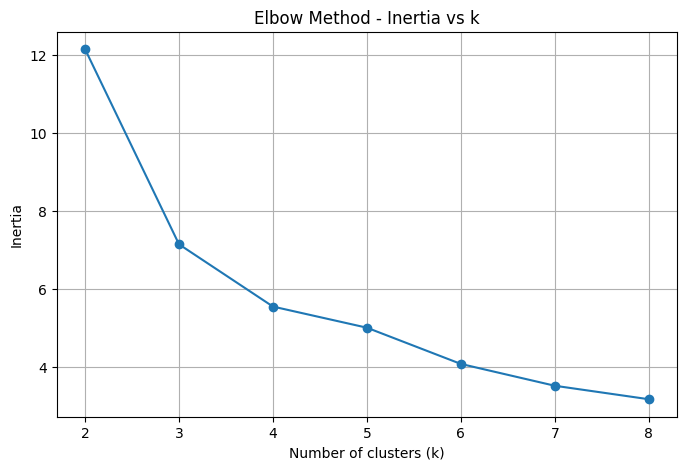

In [31]:
plt.figure(figsize=(8,5))
plt.plot(results_df['k'], results_df['Inertia'], marker='o')
plt.title('Elbow Method - Inertia vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


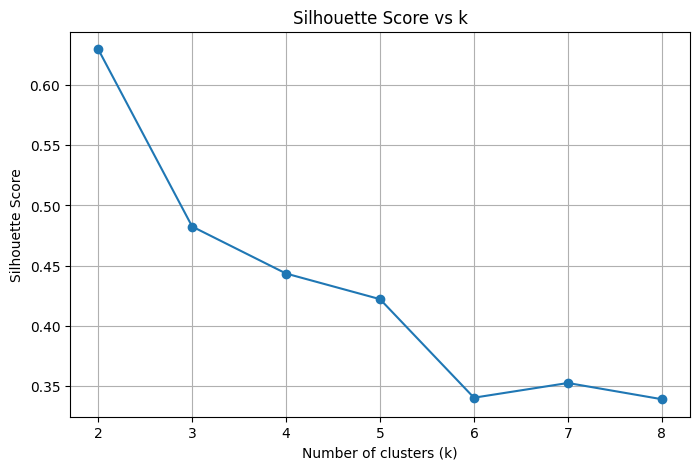

In [32]:
plt.figure(figsize=(8,5))
plt.plot(results_df['k'], results_df['Silhouette Score'], marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


1. How do the inertia and silhouette scores change?

- Inertia decrease very fast before k=3, the highest silhouette is k=2

2. What if you don't scale your features?

- dont scale will cause the cluster become worse

3. Is there a 'right' k? Why or why not?

- There is no right k, but 2 or 3 may be better